# Lightcurve (+ Transit) Creation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lightcurveenhanced as lce
plt.rcParams["lines.markersize"] = 3

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
        1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
        1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
        1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
        1.43, 1.44, 1.45, 1.46, 1.47, 

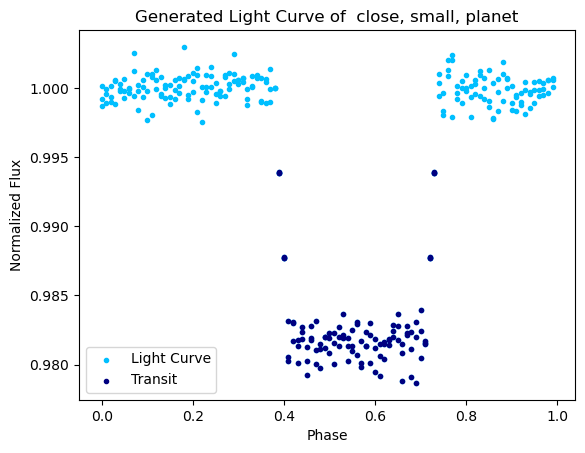

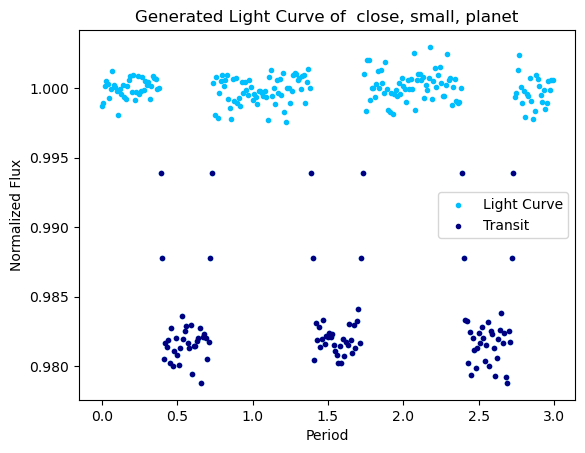

In [2]:
shallow_long_transit = lce.LightCurveTheoretical(ticksinper = 100, depth = .02, duration = .3, numper = 3, name = " close, small, planet")
y = shallow_long_transit.plot_transit(phase_flag=True)
shallow_long_transit.plot_transit(phase_flag=False)



In [3]:
len(y[1])

300

In [4]:
testplanet = lce.Exoplanet(1.35, .047)


In [5]:
teststar = lce.Star(1.2)

In [6]:
sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=1000, numper = 3)

[]
[]
[]
[]
[]


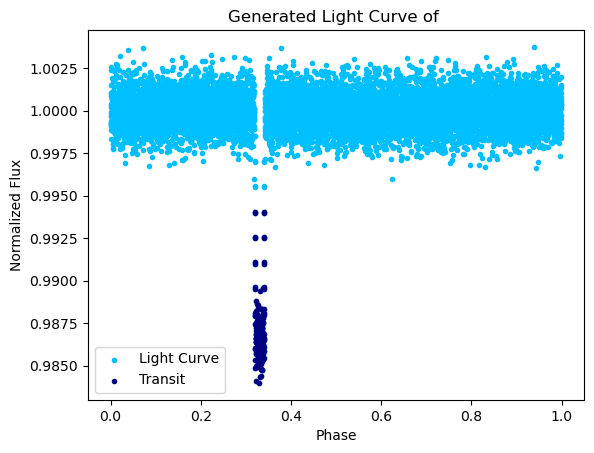

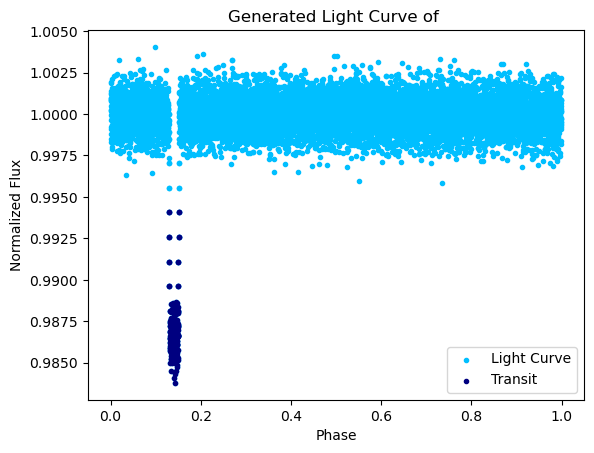

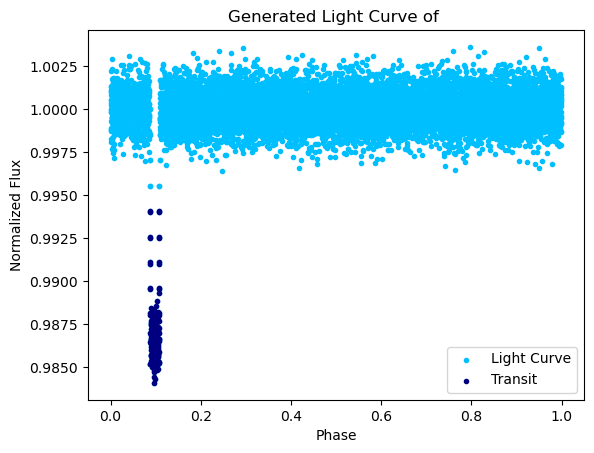

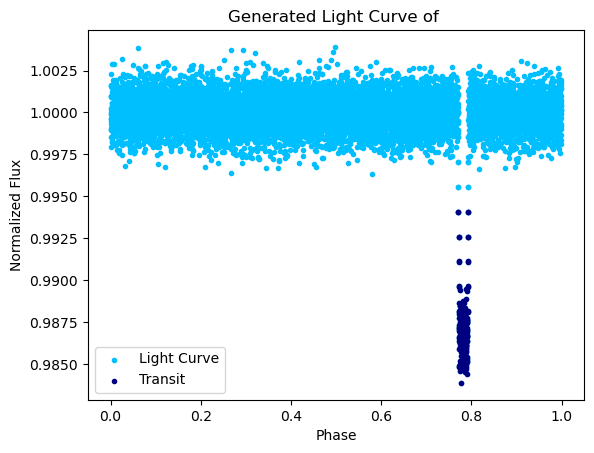

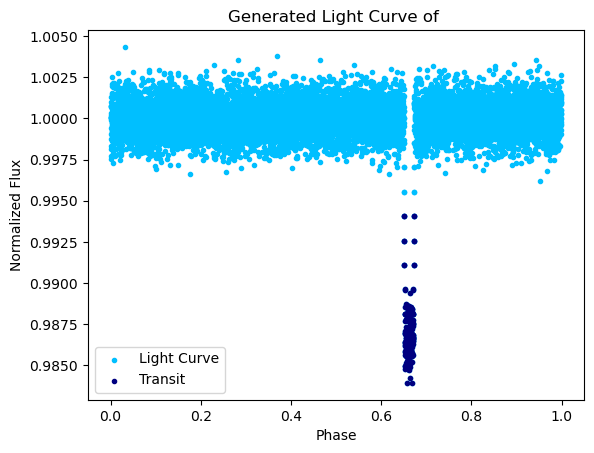

In [7]:
for i in np.arange(0,5):
        sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=5000, numper = 2)                
        sunjup.plot_transit(phase_flag=True)

[0.0, 0.9]


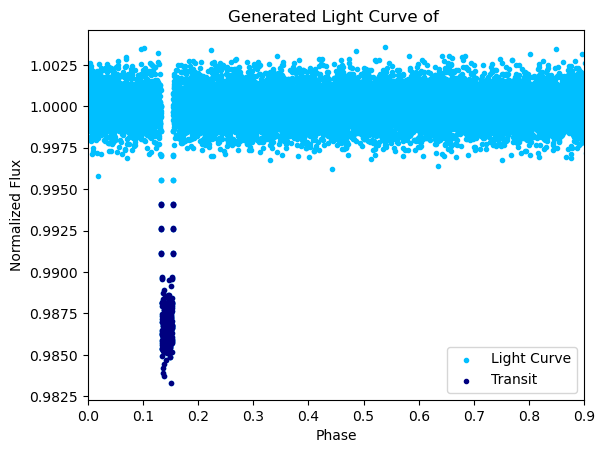

In [ ]:
sunjup = lce.LightCurveExoplanet(testplanet, teststar, ticksinper=5000, numper = 3)                
x = sunjup.plot_transit(phase_flag=True)

[0.1, 0.2]


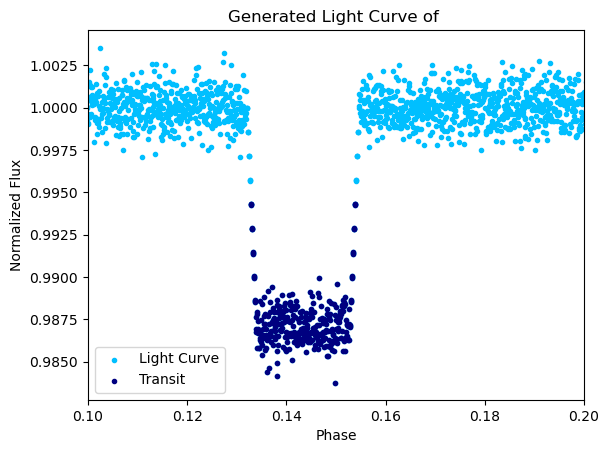

In [10]:
x = sunjup.plot_transit(phase_flag=True, xlim = [0.1,0.2])